# 載入 Lib 程式

## Import

In [1]:
%%time
import time
import sys
import os
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

maxDepth = 10 # 樹訓練深度
YYYYMMs = [
    'v2_202304', 'v2_202305', 'v2_202306', 'v2_202307', 'v2_202308', 'v2_202309', 
    'v2_202310', 'v2_202311', 'v2_202312', 'v2_202401', 'v2_202402', 'v2_202403',
    'v2_202404'
] 

CPU times: user 526 ms, sys: 2.05 s, total: 2.58 s
Wall time: 380 ms


## Load Lib

In [2]:
%%time

rootPath = os.path.dirname(os.path.dirname(os.path.dirname(os.getcwd())))
    
# 掛載 Python Lib 資料夾 
module_path = f'{rootPath}/Lib'
if module_path not in sys.path:
    sys.path.append(module_path)

print(f'rootPath : {rootPath}')
 
import DataSourceLib   
import importlib 
importlib.reload(DataSourceLib)  

rootPath : /Users/elliesu/Lawrence/MasterThesis
CPU times: user 93.8 ms, sys: 12 ms, total: 106 ms
Wall time: 105 ms


<module 'DataSourceLib' from '/Users/elliesu/Lawrence/MasterThesis/Lib/DataSourceLib.py'>

## 定義共用 Function

In [21]:
def evaluate_decision_tree(model, x, y_actual): 
    accuracy_score = model.score(x, y_actual) 
    y_predicted = model.predict(x) 
    
    confusion_mat = confusion_matrix(y_actual, y_predicted)
    print(f'\x1b[32m實際結果 : {y_actual.reshape(-1)}\x1b[0m')
    print(f'\x1b[32m預測結果 : {y_predicted}\x1b[0m')
    print(f'\x1b[32m準確度 accuracy : {accuracy_score}\x1b[0m')
    print(f'\x1b[32mDecisionTree\n{classification_report(y_actual, y_predicted, digits=4)}\x1b[0m')
    print(confusion_mat)

   
    import matplotlib.pyplot as plt
    import seaborn as sns

    plt.figure(figsize=(10, 6))  # 可選，指定圖的大小
    # sns.heatmap(cn, cmap = sns.color_palette("Blues"), annot=True, fmt=".2f", center=0.5)
    sns.heatmap(confusion_mat, annot=True, cmap='viridis', fmt=".0f")
    
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title(f'Confusion Matrix (Accuracy: {accuracy_score:.4f})')
 

# 資料集

## 欄位名稱

In [4]:
labelTypeNames = ['(1) API正常', '(2) API其它', '(3) 非API正常', '(4) 非API其它', '(5) 爬蟲正常', '(6) 爬蟲其它']

colNames2 = ['Label', 'Status', 'SendBytes', 'ReceiveBytes', 'UrlType']
featureColNames2 = colNames2[1:]

## 載入資料集

In [5]:
%%time

df_source_data = DataSourceLib.getDataSources(rootPath, yyyymms=YYYYMMs) 
df_source_data.head(2)

v2_202304 shape (2214585, 13)
v2_202305 shape (2169731, 13)
v2_202306 shape (2977790, 13)
v2_202307 shape (2088002, 13)
v2_202308 shape (2140783, 13)
v2_202309 shape (1536336, 13)
v2_202310 shape (1615911, 13)
v2_202311 shape (1886285, 13)
v2_202312 shape (1542114, 13)
v2_202401 shape (1682544, 13)
v2_202402 shape (1690037, 13)
v2_202403 shape (2312996, 13)
v2_202404 shape (2420268, 13)
total shape (26277382, 13)
CPU times: user 50.8 s, sys: 8.14 s, total: 58.9 s
Wall time: 1min 1s


,RequestTime,Method,Status,URI,UserAgent,ClientIP,ClientIpIndex,CountryCode,Referer,SendBytes,ReceiveBytes,TimeTaken,Label
0,2023-04-02 08:00:00,GET,200,/school/detail/861e9931-0acd-415b-83f4-1eb61db...,Mozilla/5.0 (compatible; Googlebot/2.1; http:...,66.249.70.114,370229.0,US,NaN,108752,375,648,5
1,2023-04-02 08:00:54,GET,301,/ads.txt,got (https://github.com/sindresorhus/got),85.10.202.243,371917.0,DE,NaN,372,156,285,4


In [6]:
%%time

# 手動離散化 URI 欄位
df_source_data
DataSourceLib.uriDiscrete(df_source_data)
df_source_data.head(2)

CPU times: user 10.6 s, sys: 178 ms, total: 10.8 s
Wall time: 10.8 s


,RequestTime,Method,Status,URI,UrlType,UserAgent,ClientIP,ClientIpIndex,CountryCode,Referer,SendBytes,ReceiveBytes,TimeTaken,Label
0,2023-04-02 08:00:00,GET,200,/school/detail/861e9931-0acd-415b-83f4-1eb61db...,2,Mozilla/5.0 (compatible; Googlebot/2.1; http:...,66.249.70.114,370229.0,US,NaN,108752,375,648,5
1,2023-04-02 08:00:54,GET,301,/ads.txt,3,got (https://github.com/sindresorhus/got),85.10.202.243,371917.0,DE,NaN,372,156,285,4


# 資料編碼集切割

## 新特徵欄位 type2 (自選)

In [7]:
%%time

# 刪除沒有用到分類特徵
df_okdata_type2 = df_source_data[colNames2] 
print(df_okdata_type2.shape)
print(df_okdata_type2.head(2))

# 切割訓練集與測試集
X_train_type2, X_test_type2, y_train_type2, y_test_type2 = DataSourceLib.trainTestSplit(df_okdata_type2)
X_train_type2[:2]

(26277382, 5)
   Label  Status  SendBytes  ReceiveBytes  UrlType
0      5     200     108752           375        2
1      4     301        372           156        3
testSize: 0.2 randomState: 42
Train X shape: (21021905, 4)
Train Y shape: (21021905, 1)
Test X shape: (5255477, 4)
Test Y shape: (5255477, 1)
Train Label 比例
3    0.508186
1    0.375794
5    0.068564
4    0.041217
6    0.005061
2    0.001178
dtype: float64

Test Label 比例
3    0.508186
1    0.375794
5    0.068564
4    0.041217
6    0.005061
2    0.001178
dtype: float64
CPU times: user 49.1 s, sys: 3.27 s, total: 52.4 s
Wall time: 53.8 s


array([[ 200, 5213,  888,    2],
       [ 200,  248,  927,    1]])

# 集成式學習

## 決策樹（DecisionTreeClassifier）

In [29]:
%%time
from sklearn.tree import DecisionTreeClassifier
  
dtModel = DecisionTreeClassifier(criterion = 'gini', max_depth = maxDepth, random_state=42)
dtModel.fit(X_train_type2, y_train_type2)

CPU times: user 24.7 s, sys: 302 ms, total: 25 s
Wall time: 25 s


DecisionTreeClassifier(max_depth=10, random_state=42)

實際結果 : [1 1 1 ... 1 1 3]
預測結果 : [1 1 1 ... 1 1 3]
準確度 accuracy : 0.9925523411100458
DecisionTree
              precision    recall  f1-score   support

           1     0.9964    0.9999    0.9981   1974978
           2     0.9976    0.9905    0.9940      6193
           3     0.9912    0.9978    0.9945   2670759
           4     0.9926    0.9980    0.9953    216617
           5     0.9813    0.9146    0.9468    360334
           6     0.9824    0.9404    0.9609     26596

    accuracy                         0.9926   5255477
   macro avg     0.9902    0.9735    0.9816   5255477
weighted avg     0.9925    0.9926    0.9924   5255477

[[1974687       0       1       0     290       0]
 [      0    6134       0      43       0      16]
 [      0       0 2664768       0    5991       0]
 [      0       0       2  216182       0     433]
 [   7161       0   23618       0  329555       0]
 [      0      15       0    1570       1   25010]]
CPU times: user 6.95 s, sys: 375 ms, total: 7.33 s
Wa

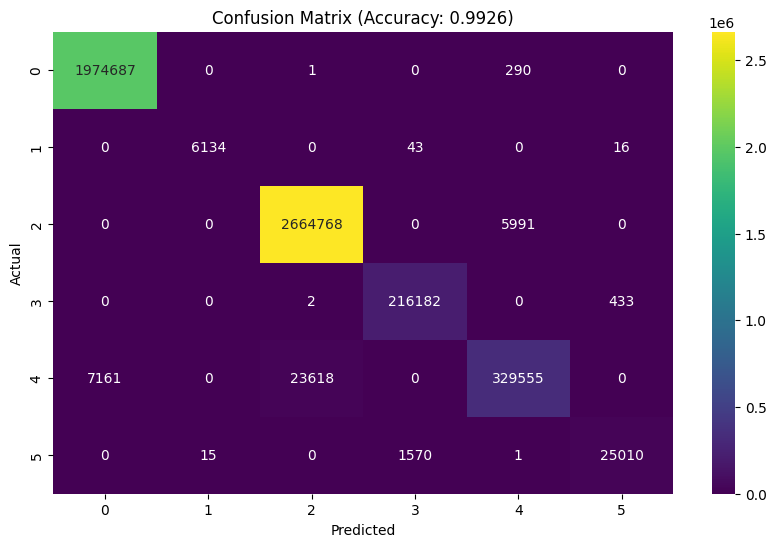

In [22]:
%%time
# 測試集
evaluate_decision_tree(dtModel, X_test_type2, y_test_type2) 

## 支持向量機（SVM），超慢放棄

In [10]:
# from sklearn.svm import SVC # 超慢

# svmModel = SVC(kernel="linear", C=0.1)
# # svmModel = SVC(gamma=.1, kernel='rbf', probability=True)
# svmModel.fit(X_train_type2, y_train_type2.ravel())

In [11]:
# from sklearn import svm

# svrModel = svm.SVR(C=1, kernel='rbf', max_iter=1000)
# svrModel.fit(X_train_type2, y_train_type2.ravel())

In [12]:
# svrScore = svrModel.score(X_test_type2, y_test_type2) 
# svrPredicted = svrModel.predict(X_test_type2)
# # svrCn = confusion_matrix(y_test_type2, svrPredicted)

# print(f'\x1b[32m預設結果 : {svrPredicted}\x1b[0m')
# print(f'\x1b[32m實際結果 : {y_test_type2.reshape(-1)}\x1b[0m')
# print(f'\x1b[32m準確度 accuracy : {svrScore}\x1b[0m')
# # print(f'\x1b[32m{classification_report(y_test_type2, svrPredicted)}\x1b[0m') 
# # print(svrCn)

## 隨機森林分類（RandomForestClassifier）

In [13]:
%%time
from sklearn.ensemble import RandomForestClassifier

rfcModel = RandomForestClassifier(n_estimators = 5, criterion = 'gini', max_depth = maxDepth, random_state=4)
rfcModel.fit(X_train_type2, y_train_type2.ravel())

CPU times: user 1min 15s, sys: 2.18 s, total: 1min 17s
Wall time: 1min 17s


RandomForestClassifier(max_depth=10, n_estimators=5, random_state=4)

實際結果 : [1 1 1 ... 1 1 3]
預測結果 : [1 1 1 ... 1 1 3]
準確度 accuracy : 0.992559381384411
DecisionTree
              precision    recall  f1-score   support

           1     0.9963    0.9999    0.9981   1974978
           2     0.9972    0.9806    0.9888      6193
           3     0.9909    0.9981    0.9945   2670759
           4     0.9929    0.9977    0.9953    216617
           5     0.9848    0.9115    0.9467    360334
           6     0.9779    0.9428    0.9600     26596

    accuracy                         0.9926   5255477
   macro avg     0.9900    0.9718    0.9806   5255477
weighted avg     0.9925    0.9926    0.9924   5255477

[[1974870       0       3       0     105       0]
 [      0    6073       0      43       0      77]
 [      0       0 2665785       0    4974       0]
 [      0       0       0  216126       0     491]
 [   7356       0   24535       0  328443       0]
 [      0      17       0    1503       0   25076]]
CPU times: user 9.92 s, sys: 892 ms, total: 10.8 s
Wal

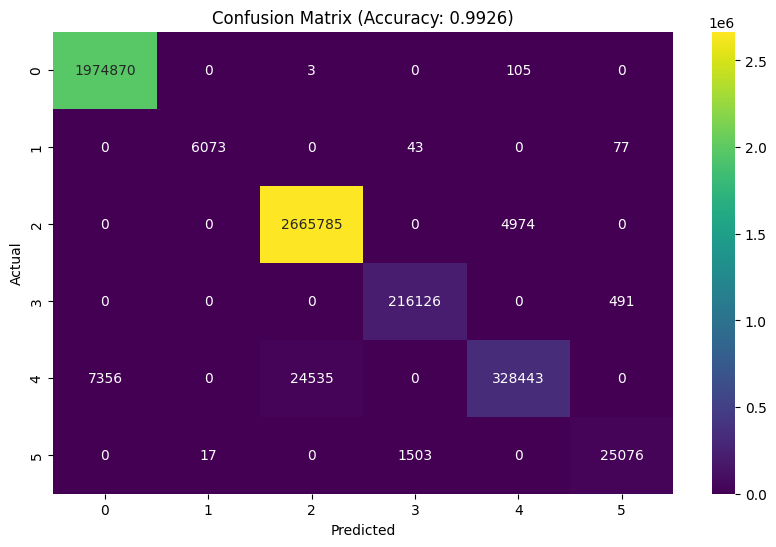

In [23]:
%%time
# 測試集
evaluate_decision_tree(rfcModel, X_test_type2, y_test_type2) 

## K Neighbors Classifier

In [15]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knnModel = KNeighborsClassifier(n_neighbors=6)
knnModel.fit(X_train_type2, y_train_type2.ravel())

CPU times: user 15.2 s, sys: 227 ms, total: 15.4 s
Wall time: 15.1 s


KNeighborsClassifier(n_neighbors=6)

實際結果 : [1 1 1 ... 1 1 3]
預測結果 : [1 1 1 ... 1 1 3]
準確度 accuracy : 0.9958685006137407
DecisionTree
              precision    recall  f1-score   support

           1     0.9964    0.9976    0.9970   1974978
           2     0.9672    0.9716    0.9694      6193
           3     0.9963    0.9973    0.9968   2670759
           4     0.9969    0.9973    0.9971    216617
           5     0.9903    0.9763    0.9833    360334
           6     0.9843    0.9795    0.9819     26596

    accuracy                         0.9959   5255477
   macro avg     0.9886    0.9866    0.9876   5255477
weighted avg     0.9959    0.9959    0.9959   5255477

[[1970314       0    3943       3     718       0]
 [      4    6017       0     153       0      19]
 [   4484       0 2663562       0    2713       0]
 [      7     182       3  216029       0     396]
 [   2660       0    5883       0  351791       0]
 [      1      22       0     521       1   26051]]
CPU times: user 26min 20s, sys: 2.04 s, total: 26min 

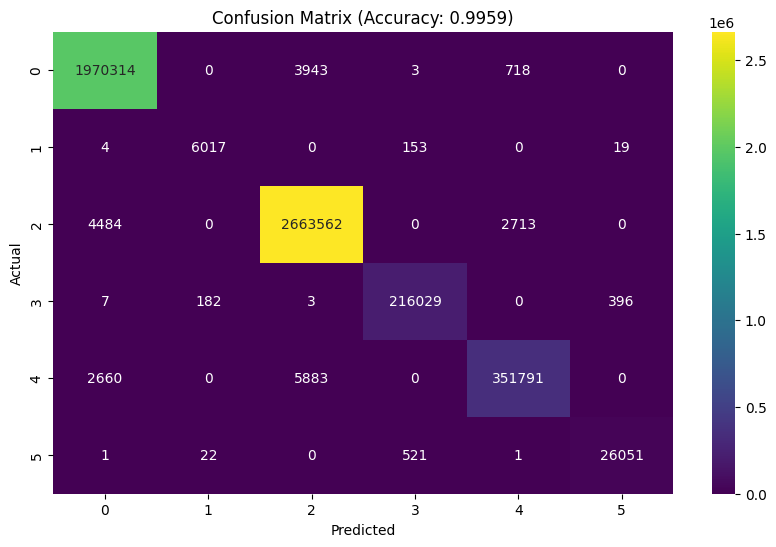

In [24]:
%%time
# 測試集
# 計算 & 預測都很慢 
evaluate_decision_tree(knnModel, X_test_type2, y_test_type2) 

## 集成投票分類(Ensemble Voting Classifier) 硬式投票

In [17]:
%%time
from sklearn.ensemble import VotingClassifier

vclf1 = VotingClassifier(estimators = [
        ('DecisionTree', dtModel), 
        ('RandomForest', rfcModel), 
        ('KNeighbors', knnModel) 
    ],
    voting = 'hard', 
    n_jobs = -1
)
vclf1.fit(X_train_type2, y_train_type2.ravel())

CPU times: user 1.93 s, sys: 2.93 s, total: 4.86 s
Wall time: 1min 21s


VotingClassifier(estimators=[('DecisionTree',
                              DecisionTreeClassifier(max_depth=10,
                                                     random_state=42)),
                             ('RandomForest',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=5,
                                                     random_state=4)),
                             ('KNeighbors',
                              KNeighborsClassifier(n_neighbors=6))],
                 n_jobs=-1)

實際結果 : [1 1 1 ... 1 1 3]
預測結果 : [1 1 1 ... 1 1 3]
準確度 accuracy : 0.9934692892766918
DecisionTree
              precision    recall  f1-score   support

           1     0.9965    0.9999    0.9982   1974978
           2     0.9969    0.9908    0.9938      6193
           3     0.9920    0.9986    0.9953   2670759
           4     0.9930    0.9983    0.9957    216617
           5     0.9883    0.9209    0.9535    360334
           6     0.9853    0.9437    0.9640     26596

    accuracy                         0.9935   5255477
   macro avg     0.9920    0.9754    0.9834   5255477
weighted avg     0.9934    0.9935    0.9934   5255477

[[1974847       0       4       0     127       0]
 [      0    6136       0      43       0      14]
 [      1       0 2666973       0    3785       0]
 [      1       1       0  216255       0     360]
 [   6959       0   21529       0  331846       0]
 [      0      18       0    1480       0   25098]]
CPU times: user 26min 39s, sys: 2.43 s, total: 26min 

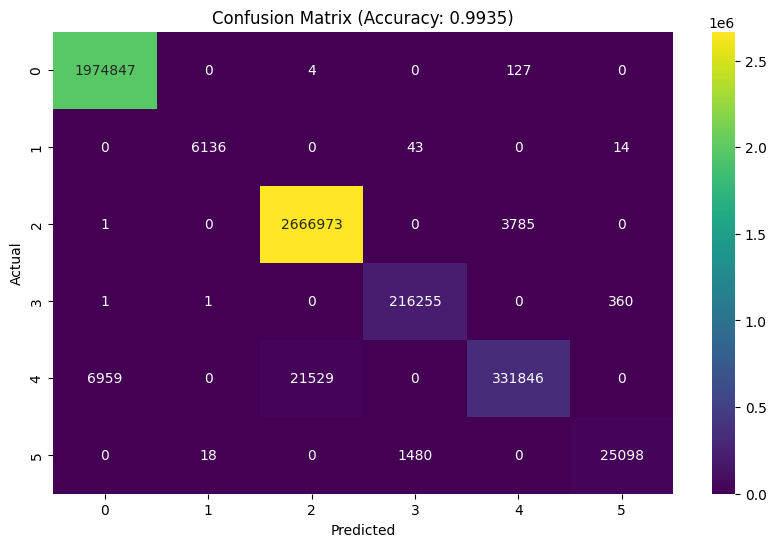

In [27]:
%%time
# 測試集 
evaluate_decision_tree(vclf1, X_test_type2, y_test_type2) 

## 集成投票分類(Ensemble Voting Classifier) 軟式投票

In [19]:
%%time
vclf2 = VotingClassifier(estimators = [
        ('DecisionTree', dtModel), 
        ('RandomForest', rfcModel), 
        ('KNeighbors', knnModel) 
    ],
    voting = 'soft', 
    n_jobs = -1
)
vclf2.fit(X_train_type2, y_train_type2.ravel())

CPU times: user 1.75 s, sys: 3.51 s, total: 5.27 s
Wall time: 1min 20s


VotingClassifier(estimators=[('DecisionTree',
                              DecisionTreeClassifier(max_depth=10,
                                                     random_state=42)),
                             ('RandomForest',
                              RandomForestClassifier(max_depth=10,
                                                     n_estimators=5,
                                                     random_state=4)),
                             ('KNeighbors',
                              KNeighborsClassifier(n_neighbors=6))],
                 n_jobs=-1, voting='soft')

實際結果 : [1 1 1 ... 1 1 3]
預測結果 : [1 1 1 ... 1 1 3]
準確度 accuracy : 0.994244861122977
DecisionTree
              precision    recall  f1-score   support

           1     0.9967    1.0000    0.9983   1974978
           2     0.9977    0.9905    0.9941      6193
           3     0.9926    0.9991    0.9959   2670759
           4     0.9949    0.9987    0.9968    216617
           5     0.9928    0.9267    0.9586    360334
           6     0.9883    0.9596    0.9738     26596

    accuracy                         0.9942   5255477
   macro avg     0.9938    0.9791    0.9862   5255477
weighted avg     0.9942    0.9942    0.9942   5255477

[[1974880       0       2       0      96       0]
 [      0    6134       0      43       0      16]
 [      0       0 2668432       0    2327       0]
 [      0       0       0  216331       0     286]
 [   6593       0   19809       0  333932       0]
 [      0      14       0    1060       0   25522]]
CPU times: user 24min 19s, sys: 2.91 s, total: 24min 2

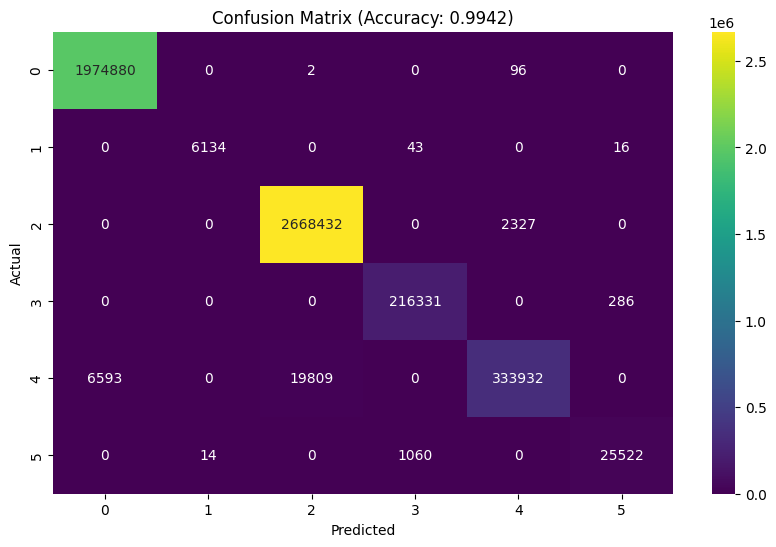

In [28]:
%%time
# 測試集 
evaluate_decision_tree(vclf2, X_test_type2, y_test_type2) 